# Monte Carlo: Lecture 1 Excercises
Jose Javier Fernández González

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Throwing one die
## Setup

In [2]:
die_values = np.linspace(1,6,6,dtype=int)
n_int = int(1e4)

## Numerical

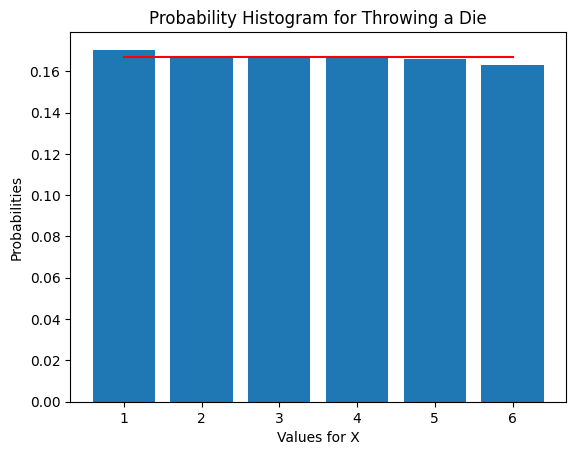

In [3]:
x_values = np.random.choice(a=die_values, size=n_int) # By default choice follows a uniform distribution
_, counts =np.unique(x_values, return_counts=True)

plt.bar(die_values, counts/n_int)
plt.plot(die_values, len(die_values)*[1/len(die_values)], color='r', label='')
plt.xlabel('Values for X')
plt.ylabel('Probabilities')
plt.title(f"Probability Histogram for Throwing a Die")
plt.show()

# Throwing two dice

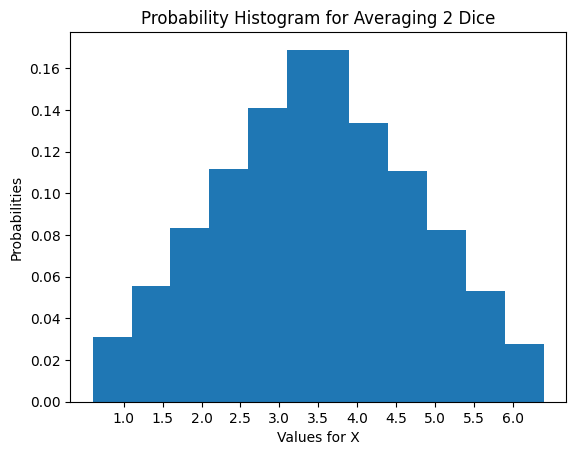

In [4]:
x1_values = np.random.choice(a=die_values, size=n_int)
x2_values = np.random.choice(a=die_values, size=n_int)
xt_values = (x1_values + x2_values)/2
xt_unique, xt_counts =np.unique(xt_values, return_counts=True)

plt.bar(xt_unique, xt_counts/n_int)
plt.xticks(np.arange(1.0, 6.5, 0.5))  
plt.xlabel('Values for X')
plt.ylabel('Probabilities')
plt.title(f"Probability Histogram for Averaging 2 Dice")
plt.show()

# Throwing multiple dice

Normalization: 0.9999999999999992


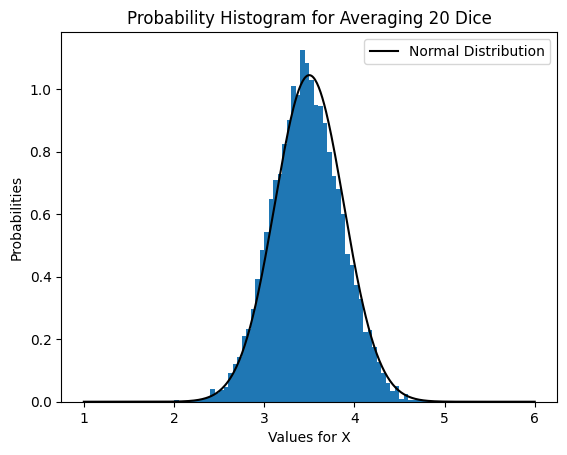

In [5]:
n_dice = int(20)
xn_values = np.random.choice(a=die_values, size=(n_int, n_dice))
xt_values = np.sum(xn_values, axis=1)/xn_values.shape[1]

mu = die_values.mean()
sigma = die_values.std()
clt_sigma = sigma / np.sqrt(n_dice)
clt_x = np.linspace(1,6,int(5e2))
clt_p = norm.pdf(clt_x, loc=mu, scale=clt_sigma)

dx = 1/n_dice
histogram_probs, edges = np.histogram(xt_values, bins=np.arange(1.0, 6.0 + dx, dx ), density=True)
bar_centers = (edges[1:] + edges[:-1])/2

normalization_constant = np.sum(dx*histogram_probs)

print(f"Normalization: {normalization_constant}")

plt.bar(bar_centers, histogram_probs, width=dx)
plt.plot(clt_x, clt_p, color='black', label="Normal Distribution")
plt.xlabel('Values for X')
plt.ylabel('Probabilities')
plt.title(f"Probability Histogram for Averaging {n_dice} Dice")
plt.legend()
plt.show()

# Error estimation

In [6]:
theoretical_mu = die_values.mean()
theoretical_sigma = die_values.std()
print(f"Theoretical Mean Value: {theoretical_mu}")
print(f"Theoretical Sigma Value: {theoretical_sigma}")

for n_iter in [10, 100]:
    xn_values = np.random.choice(a=die_values, size=n_iter)
    estimated_mu = xn_values.mean()
    estimated_sigma = xn_values.std()

    print(f"\n*********\nNumber of Dice: {n_iter}")
    print(f"Estimated Mean Value: {estimated_mu}")
    print(f"Estimated Sigma Value: {estimated_sigma}")
    print(f"Estimated Sigma' Value: {estimated_sigma/np.sqrt(n_iter)}")
    print(f"Theoretical Sigma' Value: {theoretical_sigma/np.sqrt(n_iter)}")
    print(f"Normalization for {n_iter} Dice: {normalization_constant}")


Theoretical Mean Value: 3.5
Theoretical Sigma Value: 1.707825127659933

*********
Number of Dice: 10
Estimated Mean Value: 2.8
Estimated Sigma Value: 1.886796226411321
Estimated Sigma' Value: 0.5966573556070519
Theoretical Sigma' Value: 0.5400617248673216
Normalization for 10 Dice: 0.9999999999999992

*********
Number of Dice: 100
Estimated Mean Value: 3.66
Estimated Sigma Value: 1.644506004853737
Estimated Sigma' Value: 0.1644506004853737
Theoretical Sigma' Value: 0.1707825127659933
Normalization for 100 Dice: 0.9999999999999992


# Extra

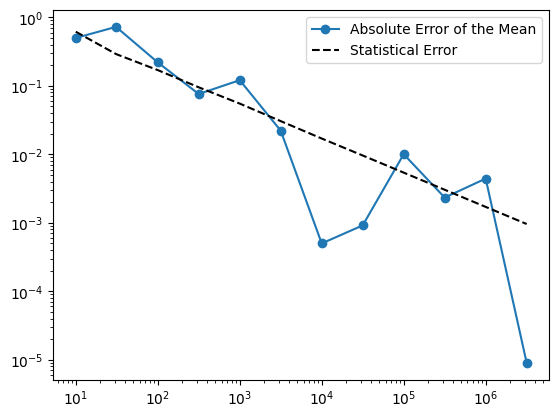

In [7]:
n_iter_list = []
abs_error_list = []
stat_error_list = []

for n in np.arange(1,7,0.5):
    n_iter = int(10**n)
    xn_values = np.random.choice(a=die_values, size=n_iter)
    estimated_mu = xn_values.mean()
    estimated_sigma = xn_values.std()

    n_iter_list.append(n_iter)
    abs_error_list.append(np.abs(estimated_mu-3.5))
    stat_error_list.append(estimated_sigma/np.sqrt(n_iter))


plt.plot(n_iter_list, abs_error_list, '-o', label='Absolute Error of the Mean')
plt.plot(n_iter_list, stat_error_list, color='black', linestyle='dashed', label='Statistical Error')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
